In [1]:
import pandas as pd
url = (
"https://archive.ics.uci.edu/ml/machine-learning-databases"
"/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)
abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

1. Lo primero que debe hacer es eliminar la variable “Sex”.
2. Realice estadística descriptiva para el conjunto de datos entregados.
3. La variable objetivo es “Rings”, por lo que muestre la distribución de
estos datos e interprete.
4. Entregue la matriz de correlación ¿Qué variables pueden estar
correlacionadas?
5. Defina las distancias en los vectores de las variables independientes.
Para esto puede usar el atributo .values de Numpy
6. Guarde los datos en una matriz y úselo en este código:

In [2]:
#drop “Sex”. de abalone
abalone = abalone.drop('Sex', axis=1)


In [3]:
 # Realice estadística descriptiva para el conjunto de datos entregados.
 
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


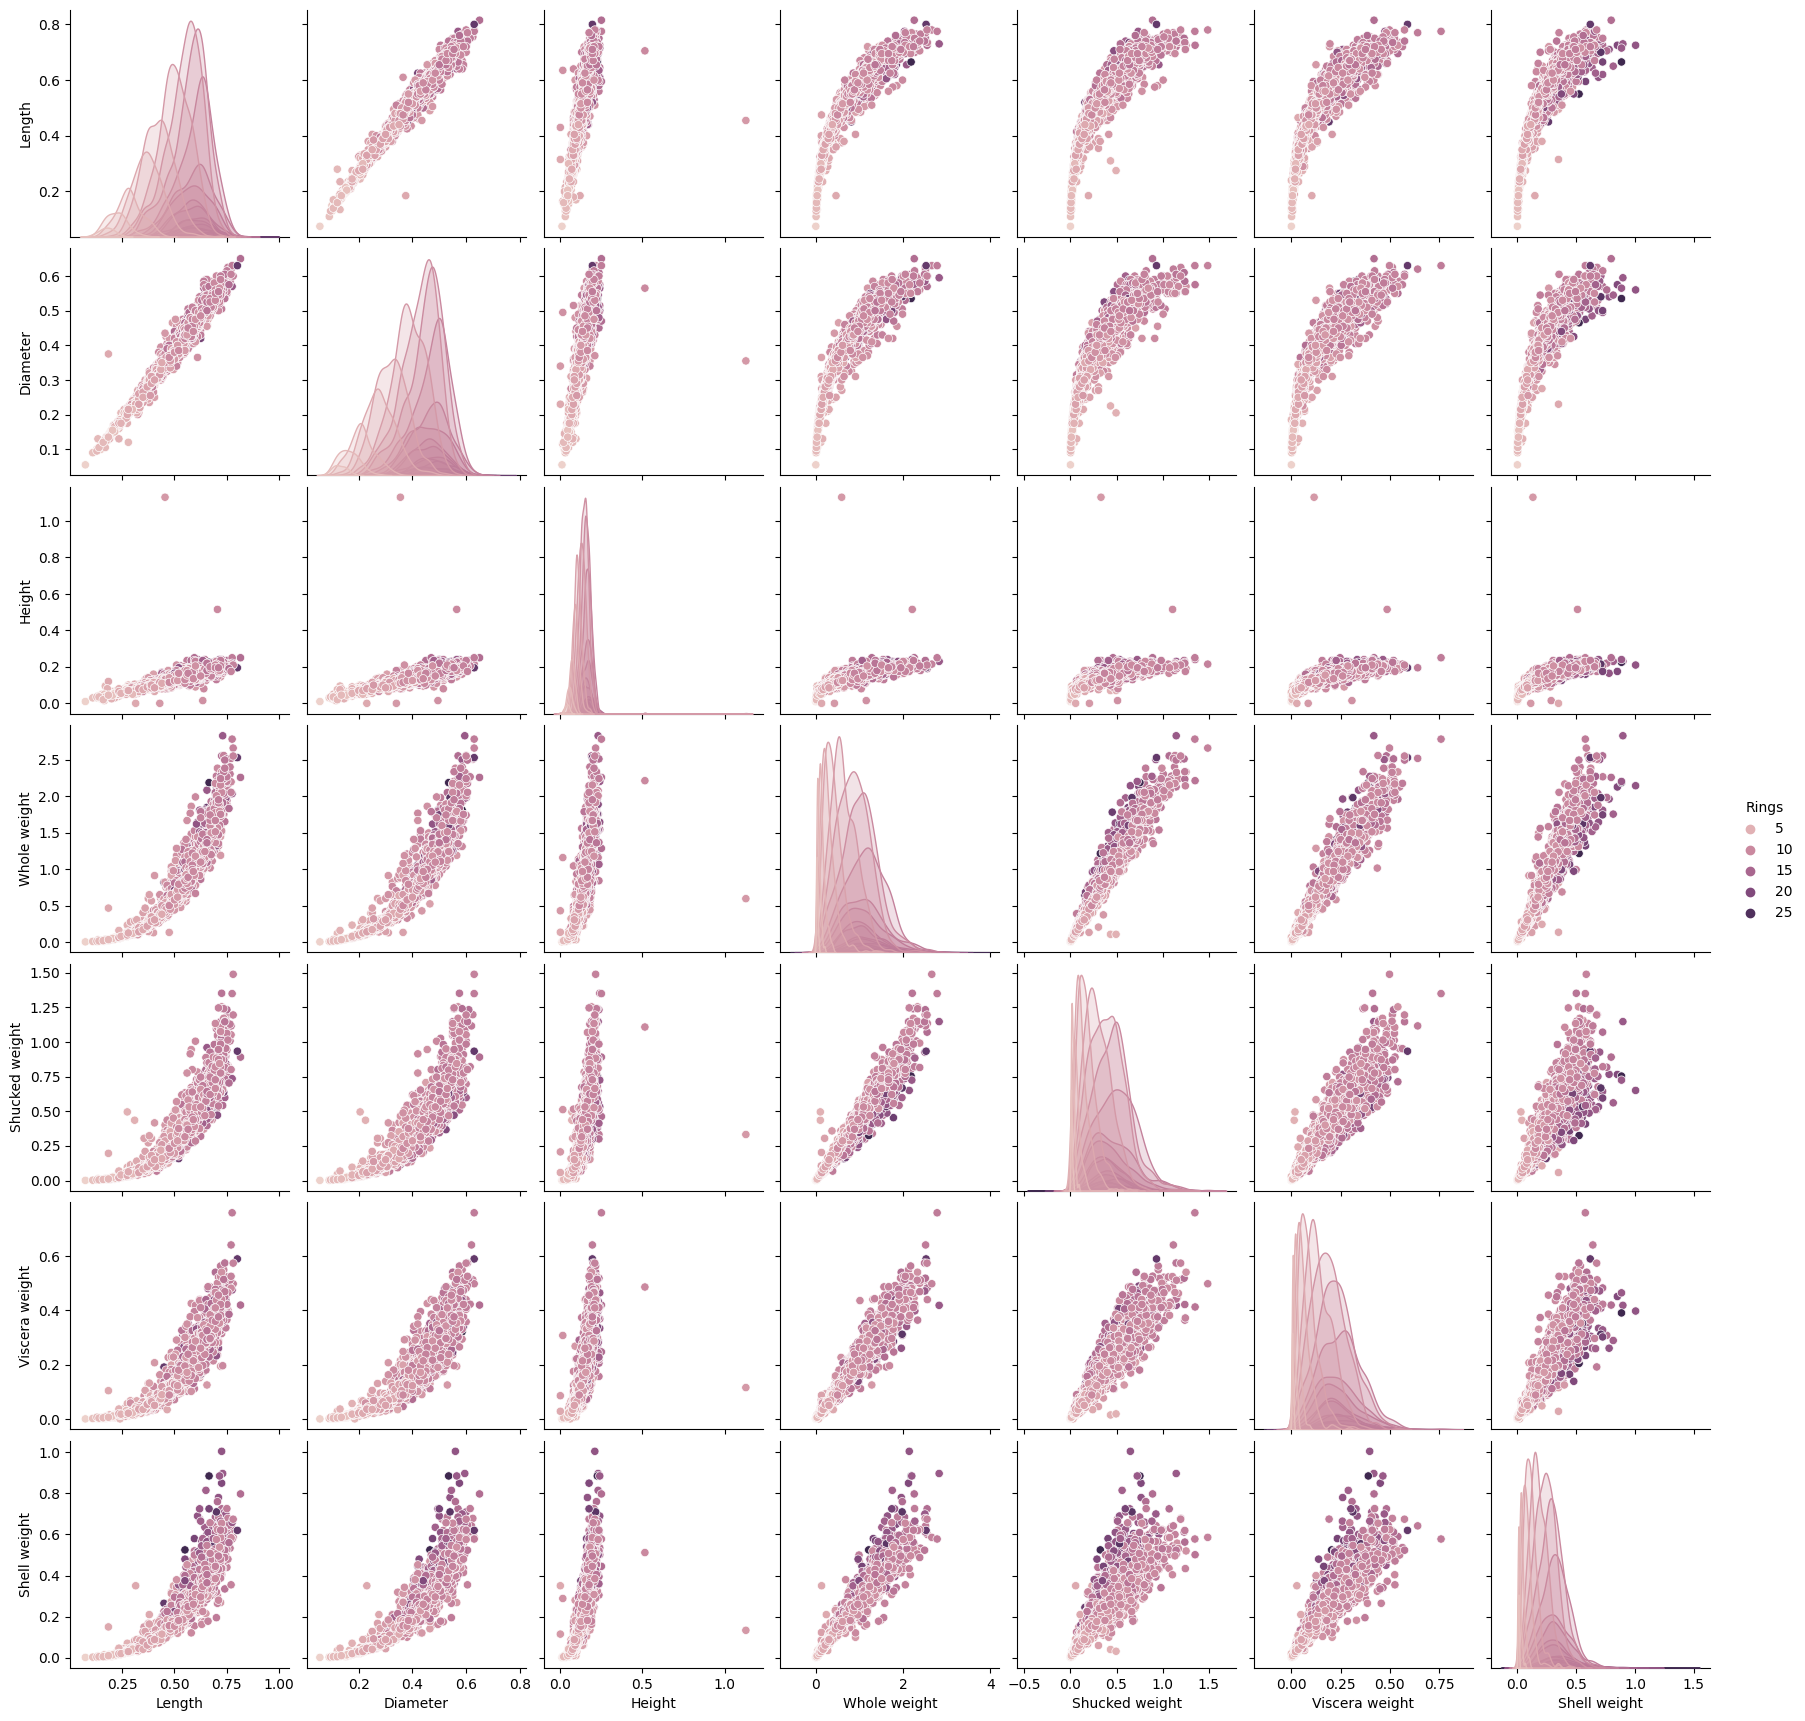

In [7]:
# La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.
sns.pairplot(abalone, hue='Rings')


<Axes: >

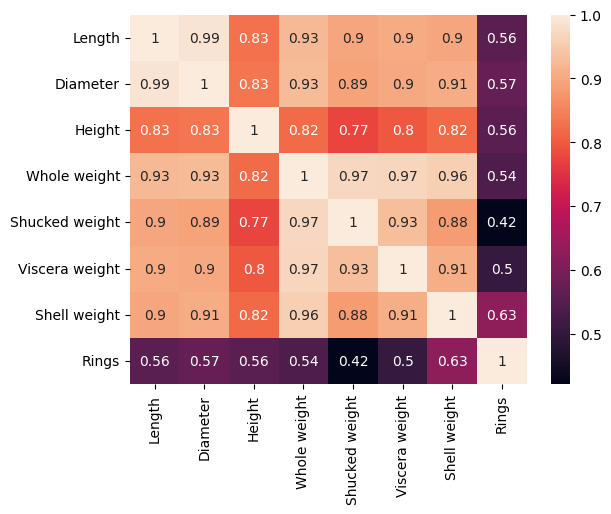

In [8]:
# correlation matrix
sns.heatmap(abalone.corr(), annot=True)

hay una alta correlación entre variables, pero no con la variable objetivo

<Axes: xlabel='Rings', ylabel='Count'>

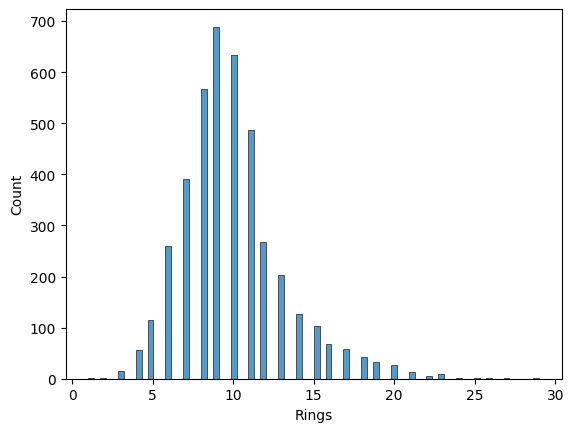

In [33]:
sns.histplot(abalone['Rings'])


In [34]:
import numpy as np
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

distances = np.linalg.norm(X - new_data_point, axis=1)

In [35]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

Estos son los tres vecinos más cercanos

In [36]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

9

In [37]:
prediction = nearest_neighbor_rings.mean()

In [38]:
prediction

10.0

In [40]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor(n_neighbors=3)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)
knn_model.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=3)

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [44]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

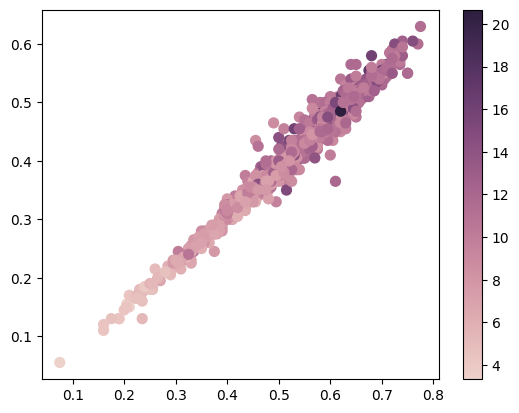

In [45]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [47]:
gridsearch.best_params_


{'n_neighbors': 25}